In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.power import TTestIndPower
from sklearn.model_selection import train_test_split

# Métricas corporativas

## 📊 ¿Qué es el P&G financiero?

El **Estado de Pérdidas y Ganancias (P&G)**, también llamado **Estado de Resultados**, es un informe financiero que muestra si una empresa **gana o pierde dinero** en un periodo determinado.

### 🎯 **¿Por qué es importante?**
Es como el "boletín de calificaciones" de una empresa 📋💰. Ayuda a responder preguntas clave como:
✅ ¿Está la empresa generando ganancias o pérdidas?  
✅ ¿Cuáles son los costos más altos?  
✅ ¿Los ingresos están creciendo o disminuyendo?  
✅ ¿Qué tan rentable es la empresa?  

### 🛠 **Estructura del P&G**
El Estado de Resultados se compone de varios elementos clave:

1️⃣ **Ingresos o Ventas** → Todo el dinero que entra por vender productos o servicios.  
2️⃣ **Costo de Ventas** → Lo que cuesta producir o comprar lo que se vende.  
3️⃣ **Utilidad Bruta** → Se obtiene restando los ingresos menos los costos de ventas.  
4️⃣ **Margen Bruto** → Qué porcentaje de los ingresos queda después de los costos directos.  
5️⃣ **Gastos Operativos** → Costos de administración, sueldos, marketing, etc.  
6️⃣ **Utilidad Operativa** → Lo que queda después de restar los gastos operativos.  
7️⃣ **Margen Operativo** → Qué porcentaje de los ingresos se queda después de gastos operativos.  
8️⃣ **Otros Ingresos y Gastos** → Intereses, impuestos, inversiones, etc.  
9️⃣ **Utilidad Neta** → Es el resultado final (ganancia o pérdida).  
🔟 **Margen Neto** → Qué porcentaje de los ingresos representa la utilidad final.  

---

### 📊 **Ejemplo de P&G financiero con márgenes**
| Concepto                    | Valor (USD) | Margen (%) |
|-----------------------------|------------|------------|
| **Ingresos**                | 100,000    | 100%       |
| **(-) Costo de Ventas**     | (40,000)   | -          |
| **= Utilidad Bruta**        | 60,000     | **60%**    |
| **(-) Gastos Operativos**   | (20,000)   | -          |
| **= Utilidad Operativa**    | 40,000     | **40%**    |
| **(-) Impuestos y Otros Gastos** | (10,000) | -          |
| **= Utilidad Neta**         | 30,000     | **30%**    |

📌 **Interpretación de los márgenes:**  
- **Margen Bruto (60%)** → Indica qué porcentaje de los ingresos queda después de cubrir los costos de producción.  
- **Margen Operativo (40%)** → Mide la eficiencia después de descontar los gastos operativos.  
- **Margen Neto (30%)** → Es el dinero real que la empresa gana después de todos los costos y gastos.  

Si una empresa tiene **márgenes bajos**, podría significar que sus costos son muy altos o que necesita mejorar su eficiencia. 🔍  

Ahora, veamos un ejemplo práctico en Python donde calculamos estos márgenes de manera automática. 📈


📊 Estado de Pérdidas y Ganancias
                   Concepto  Valor (USD)
0                  Ingresos       100000
1           Costo de Ventas       -40000
2            Utilidad Bruta        60000
3         Gastos Operativos       -20000
4        Utilidad Operativa        40000
5  Impuestos y Otros Gastos       -10000
6             Utilidad Neta        30000


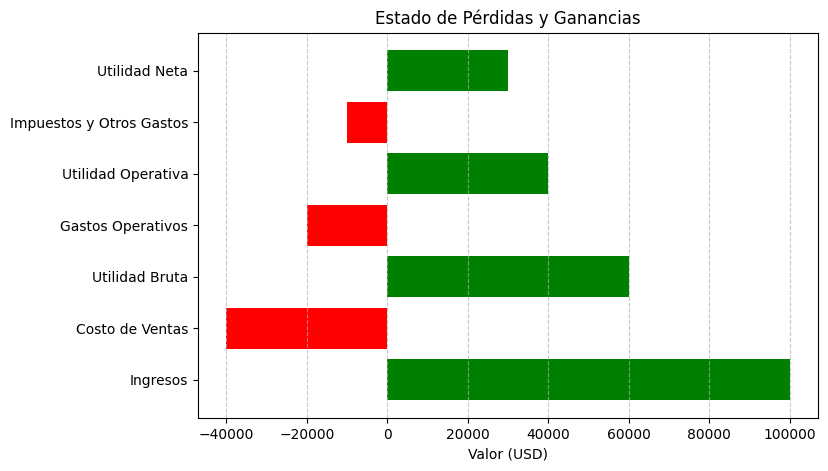

In [ ]:
# Definimos los valores de un Estado de Resultados ficticio
pg_financiero = {
    "Concepto": ["Ingresos", "Costo de Ventas", "Utilidad Bruta",
                 "Gastos Operativos", "Utilidad Operativa",
                 "Impuestos y Otros Gastos", "Utilidad Neta"],
    "Valor (USD)": [100000, -40000, 60000, -20000, 40000, -10000, 30000]
}

# Convertimos a un DataFrame de Pandas
df_pg = pd.DataFrame(pg_financiero)

# Mostramos el Estado de Resultados
print("📊 Estado de Pérdidas y Ganancias")
print(df_pg)

# 📈 Visualizamos el resultado en un gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(df_pg["Concepto"], df_pg["Valor (USD)"], color=["green" if x > 0 else "red" for x in df_pg["Valor (USD)"]])
plt.xlabel("Valor (USD)")
plt.title("Estado de Pérdidas y Ganancias")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


## 📊 Indicadores y Métricas Corporativas  

Los indicadores financieros ayudan a evaluar la salud y rentabilidad de una empresa. Son como los "exámenes médicos" de un negocio 🏥📈.  

A continuación, explicamos algunas métricas clave:

---

### 🔹 **1. ROI (Return on Investment - Retorno sobre la Inversión)**  
📌 **Fórmula:**  
$$ ROI = \left( \frac{\text{Ganancia Neta}}{\text{Inversión Inicial}} \right) \times 100 $$  

📌 **¿Para qué sirve?**  
Mide cuánto dinero ganó una empresa en relación con lo que invirtió.  

✅ **Ejemplo real:** Si inviertes 10,000 en marketing y obtienes 15,000 en ingresos adicionales, tu ROI sería **50%**.  

---

### 🔹 **2. ROE (Return on Equity - Retorno sobre el Patrimonio)**  
📌 **Fórmula:**  
$$ ROE = \left( \frac{\text{Utilidad Neta}}{\text{Patrimonio Neto}} \right) \times 100 $$  

📌 **¿Para qué sirve?**  
Muestra la rentabilidad que genera una empresa con el dinero de los accionistas.  

✅ **Ejemplo:** Si una empresa tiene 500,000 de patrimonio y gana 100,000 al año, su ROE sería **20%**.  

---

### 🔹 **3. ROMI (Return on Marketing Investment - Retorno sobre la Inversión en Marketing)**  
📌 **Fórmula:**  
$$ ROMI = \left( \frac{\text{Ingresos Adicionales} - \text{Costo de Marketing}}{\text{Costo de Marketing}} \right) \times 100 $$  

📌 **¿Para qué sirve?**  
Evalúa la rentabilidad de una inversión en marketing.  

✅ **Ejemplo:** Si gastaste 5,000 en marketing y lograste 15,000 en ingresos adicionales, el ROMI sería:  

$$ \left( \frac{15,000 - 5,000}{5,000} \right) \times 100 = 200\% $$  

---

### 🔹 **4. EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization)**  
📌 **Fórmula:**  
$$ EBITDA = \text{Utilidad Operativa} + \text{Depreciación} + \text{Amortización} $$  

📌 **¿Para qué sirve?**  
Indica la rentabilidad de una empresa antes de costos financieros, impuestos y depreciaciones.  

✅ **Ejemplo:** Si una empresa tiene 80,000 de utilidad operativa, 10,000 de depreciación y 5,000 de amortización, su **EBITDA** es **$95,000**.  

---

### 🔹 **5. Margen de Beneficio Neto**  
📌 **Fórmula:**  
$$ Margen Neto = \left( \frac{\text{Utilidad Neta}}{\text{Ingresos Totales}} \right) \times 100 $$  

📌 **¿Para qué sirve?**  
Mide qué porcentaje de cada dólar vendido se convierte en ganancia.  

✅ **Ejemplo:** Si una empresa vende 200,000 y su utilidad neta es 30,000, su margen neto es **15%**.  

---

### 🔹 **6. Razón de Liquidez**  
📌 **Fórmula:**  
$$ Razón de Liquidez = \frac{\text{Activos Corrientes}}{\text{Pasivos Corrientes}} $$  

📌 **¿Para qué sirve?**  
Mide la capacidad de la empresa para pagar sus deudas a corto plazo.  

✅ **Ejemplo:** Si tiene 50,000 en activos corrientes y 25,000 en pasivos corrientes, su razón de liquidez es **2.0** (buena salud financiera).  

---

### 📊 **Resumen de Fórmulas**
| Indicador            | Fórmula |
|----------------------|-------------------------------------------------|
| **ROI**             | $$ \left( \frac{\text{Ganancia Neta}}{\text{Inversión Inicial}} \right) \times 100 $$ |
| **ROE**             | $$ \left( \frac{\text{Utilidad Neta}}{\text{Patrimonio Neto}} \right) \times 100 $$ |
| **ROMI**            | $$ \left( \frac{\text{Ingresos Adicionales} - \text{Costo de Marketing}}{\text{Costo de Marketing}} \right) \times 100 $$ |
| **EBITDA**          | $$ \text{Utilidad Operativa} + \text{Depreciación} + \text{Amortización} $$ |
| **Margen Neto**     | $$ \left( \frac{\text{Utilidad Neta}}{\text{Ingresos Totales}} \right) \times 100 $$ |
| **Razón de Liquidez** | $$ \frac{\text{Activos Corrientes}}{\text{Pasivos Corrientes}} $$ |

Con estas métricas, una empresa puede evaluar su rentabilidad, eficiencia y sostenibilidad financiera. 💰📈  


In [ ]:

# Datos financieros de ejemplo
datos = {
    "Ingresos Totales": 200000,
    "Costo de Ventas": 80000,
    "Utilidad Neta": 30000,
    "Inversión Inicial": 100000,
    "Patrimonio Neto": 50000,
    "Utilidad Operativa": 80000,
    "Depreciación": 10000,
    "Amortización": 5000,
    "Activos Corrientes": 50000,
    "Pasivos Corrientes": 25000
}

display(datos)

# Cálculo de indicadores
indicadores = {
    "ROI (%)": (datos["Utilidad Neta"] / datos["Inversión Inicial"]) * 100,
    "ROE (%)": (datos["Utilidad Neta"] / datos["Patrimonio Neto"]) * 100,
    "EBITDA (USD)": datos["Utilidad Operativa"] + datos["Depreciación"] + datos["Amortización"],
    "Margen Neto (%)": (datos["Utilidad Neta"] / datos["Ingresos Totales"]) * 100,
    "Razón de Liquidez": datos["Activos Corrientes"] / datos["Pasivos Corrientes"]
}

# Convertir en DataFrame para mejor visualización
df_indicadores = pd.DataFrame.from_dict(indicadores, orient="index", columns=["Valor"])
display(df_indicadores)

{'Ingresos Totales': 200000,
 'Costo de Ventas': 80000,
 'Utilidad Neta': 30000,
 'Inversión Inicial': 100000,
 'Patrimonio Neto': 50000,
 'Utilidad Operativa': 80000,
 'Depreciación': 10000,
 'Amortización': 5000,
 'Activos Corrientes': 50000,
 'Pasivos Corrientes': 25000}

,Valor
ROI (%),30.0
ROE (%),60.0
EBITDA (USD),95000.0
Margen Neto (%),15.0
Razón de Liquidez,2.0


# A / B Testing

## 📊 Introducción al A/B Testing  

El **A/B Testing** es una técnica utilizada para comparar dos o más versiones de un producto, página web, campaña publicitaria u otro elemento con el objetivo de determinar cuál funciona mejor. Se basa en dividir a los usuarios en dos grupos:  

- **Grupo A**: recibe la versión original (control).  
- **Grupo B**: recibe una versión modificada (tratamiento).  

Luego, se analizan los resultados para ver cuál de las dos versiones tiene un mejor desempeño según una métrica clave (tasa de conversión, clics, tiempo de uso, etc.).  

### 🏆 **¿Para qué se usa?**  
- Optimizar páginas web o apps (¿qué diseño genera más ventas?)  
- Mejorar campañas de marketing (¿qué anuncio tiene más impacto?)  
- Evaluar cambios en productos digitales (¿este nuevo botón ayuda a la navegación?)  
- Optimizar estrategias de pricing o descuentos  

### ✅ **Fortalezas**  
✔ Permite tomar decisiones basadas en datos, no en intuición.  
✔ Se puede aplicar a muchos sectores (tecnología, marketing, salud, educación).  
✔ Es fácil de implementar con herramientas como Google Optimize o plataformas de análisis.  

### ❌ **Debilidades**  
❌ Puede requerir mucho tiempo si se necesitan grandes volúmenes de datos.  
❌ Mal diseño del experimento puede llevar a conclusiones erróneas.  
❌ No siempre es posible controlar todas las variables externas que pueden influir en el resultado.  

### 🚀 **Ejemplo en acción**  
Supongamos que tenemos una tienda en línea y queremos saber si un **botón verde** genera más ventas que un **botón rojo**.  
Se divide el tráfico de la web en dos grupos: el 50% ve el botón verde y el otro 50% ve el botón rojo.  
Después de unos días, se compara la cantidad de compras de cada grupo para determinar cuál color es más efectivo.  


![](https://miro.medium.com/v2/resize:fit:1400/1*aPUSwnuyUsxF_ACHuxiDlA.png)

In [ ]:
# Simulación de datos de conversión en un A/B Test
data = {
    "grupo": ["A"] * 1000 + ["B"] * 1000,
    "conversión": [1] * 120 + [0] * 880 + [1] * 150 + [0] * 850  # Grupo A: 12% - Grupo B: 15%
}

df = pd.DataFrame(data)
df.sample(10)

,grupo,conversión
445,A,0
878,A,0
406,A,0
672,A,0
1104,B,1
1096,B,1
1071,B,1
496,A,0
601,A,0
1678,B,0


In [ ]:
# Calcular tasas de conversión
conversiones = df.groupby("grupo")["conversión"].agg(["sum", "count"])
conversiones["tasa_conversion"] = conversiones["sum"] / conversiones["count"]

conversiones.head()

,sum,count,tasa_conversion
grupo,,,
A,120,1000,0.12
B,150,1000,0.15


In [ ]:
# Prueba estadística para determinar si hay diferencia significativa
grupo_A = df[df["grupo"] == "A"]["conversión"]
grupo_B = df[df["grupo"] == "B"]["conversión"]

stat, p_value = stats.ttest_ind(grupo_A, grupo_B)

print(f"\nP-valor: {p_value}")
if p_value < 0.05:
    print("🔹 Hay una diferencia significativa entre los grupos.")
else:
    print("🔹 No hay evidencia suficiente para decir que un grupo es mejor que otro.")


P-valor: 0.04967307061620513
🔹 Hay una diferencia significativa entre los grupos.


-----------------------------
## 🚀 Pasos Claves para Realizar un A/B Testing  

Realizar un A/B Testing correctamente implica seguir una serie de pasos para garantizar que los resultados sean confiables y estadísticamente válidos.  

---

### 1️⃣ **Realizar un A/A Testing antes del A/B Testing**  
📌 **¿Por qué?**  
Antes de lanzar el A/B Test, se recomienda hacer un **A/A Testing**, donde se comparan dos versiones **idénticas** de la página o producto.  

🎯 **Objetivo:**  
- Validar que el sistema de asignación de usuarios es **aleatorio y balanceado**.  
- Verificar que no hay **errores en la medición**.  

Si el A/A Test muestra diferencias significativas, es posible que haya un problema en la recolección de datos.  

---

### 2️⃣ **Definir el Indicador Clave a Evaluar**  
Antes de realizar el experimento, es fundamental seleccionar **qué métrica queremos mejorar**.  

💡 **Ejemplos de métricas:**  
- 📩 **Tasa de conversión:** Porcentaje de usuarios que completan una acción (ej., compra, registro).  
- ⏳ **Tiempo en la página:** Cuánto tiempo los usuarios interactúan con el contenido.  
- 🛒 **Valor promedio de compra:** Ticket promedio de las ventas realizadas.  

⚠️ **Regla de oro:**  
Elegir una **única métrica principal**, aunque se pueden analizar métricas secundarias.  

---

### 3️⃣ **Definir la Hipótesis Estadística**  
📌 **Formato general de una hipótesis en A/B Testing:**  
- **Hipótesis Nula (H₀):** No hay diferencia entre A y B.  
- **Hipótesis Alternativa (H₁):** Hay una diferencia entre A y B.  

🔹 **Ejemplo de hipótesis de 2 colas:**  
> "La tasa de conversión de la nueva versión (B) es **diferente** de la versión actual (A)."  

🔹 **Ejemplo de hipótesis de 1 cola (direccional):**  
> "La tasa de conversión de la nueva versión (B) es **mayor** que la versión actual (A)."  

---

### 4️⃣ **Definir el Tamaño de Muestra**  
Para que los resultados sean confiables, debemos asegurarnos de que la muestra sea lo suficientemente grande.  

📌 **Factores clave para calcular el tamaño de muestra:**  
- **Nivel de confianza (generalmente 95%)** → Controla el Error Tipo I.  
- **Potencia estadística (generalmente 80%)** → Controla el Error Tipo II.  
- **Diferencia mínima detectada (MDE, Minimum Detectable Effect).**  

💡 **Ejemplo de cálculo de tamaño de muestra en Python:**  
```python
from statsmodels.stats.power import TTestIndPower

# Parámetros
alpha = 0.05  # Nivel de significancia
power = 0.8   # Potencia estadística
effect_size = 0.1  # Diferencia mínima detectable (estandarizada)

# Calcular tamaño de muestra por grupo
sample_size = TTestIndPower().solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)
print(f"Tamaño mínimo de muestra por grupo: {int(sample_size)} usuarios")

```

### 5️⃣ **Definir el Método de Muestreo**
📌 Tipos de muestreo más comunes:

- **Muestreo aleatorio simple:** Todos los usuarios tienen la misma probabilidad de ser asignados a A o B.
- **Muestreo estratificado:** Se segmenta a los usuarios según alguna característica (ej., usuarios nuevos vs recurrentes).

🔹 **Regla clave:** La aleatorización debe garantizar que los grupos sean comparables.


### 6️⃣ **Diseñar el Experimento**

📌 Definir los cambios a realizar:
  - Se debe modificar un unico componente a la vez para poder garantizar causalidad.

📌 Definir la duración del test:

- Depende del tráfico y la conversión esperada.
- Usualmente entre 1 y 4 semanas.
- Se debe evitar detener el test antes de tiempo por fluctuaciones aleatorias.


### 7️⃣ **Seleccionar la Prueba Estadística**

El tipo de prueba depende del tipo de datos y el diseño del experimento.

📌 Casos comunes:

- Prueba t de Student → Para comparar promedios entre dos grupos.
- Prueba de chi-cuadrado → Para comparar proporciones entre dos grupos.
- Prueba U de Mann-Whitney → Para datos que no siguen distribución normal.

### 8️⃣ **Interpretar los Resultados y Tomar Decisiones**

📌 Reglas básicas para interpretar el p-valor:

- Si p < 0.05 → Rechazamos H₀ → Hay diferencia entre A y B.
- Si p ≥ 0.05 → No rechazamos H₀ → No hay suficiente evidencia para decir que hay diferencia.

🎯 **Consideraciones importantes:**  
- Si comparamos **más de 2 variantes (A/B/C/D)**, debemos aplicar **correcciones estadísticas** (Bonferroni, Holm o Sidak).  

-------------------------

### 🚀 **Resumen de los Pasos**  

| Paso | Acción |
|------|--------|
| **1️⃣ A/A Testing** | Verificar que el sistema asigna tráfico de manera justa antes de comenzar. |
| **2️⃣ Seleccionar Indicador** | Definir la métrica clave (ej. conversión, CTR, tiempo en página). |
| **3️⃣ Definir Hipótesis** | Determinar si será una prueba de 1 cola o 2 colas. |
| **4️⃣ Calcular Tamaño de Muestra** | Garantizar que la prueba tenga suficiente poder estadístico. |
| **5️⃣ Seleccionar Método de Muestreo** | Asegurar que la asignación de usuarios sea justa y aleatoria. |
| **6️⃣ Diseñar el Experimento** | Definir la duración del test y la segmentación. |
| **7️⃣ Seleccionar Test Estadístico** | Elegir entre prueba t, chi-cuadrado, etc. |
| **8️⃣ Analizar Resultados** | Interpretar el p-valor y evaluar el impacto del cambio. |

---

### 🎯 **Conclusión**  
📌 Hacer un A/B Test bien diseñado evita sesgos y ayuda a tomar decisiones basadas en datos.  
📌 Controlar errores estadísticos garantiza que los resultados sean confiables.  
📌 La interpretación debe considerar tanto la significancia estadística como el impacto real en el negocio.  

---

In [ ]:
# Paso 1: A/A Testing - Verificar aleatorización
def aa_testing(n_usuarios=10000):
    """Simula un A/A Test para validar aleatorización."""
    grupo_1 = np.random.binomial(n=1, p=0.10, size=n_usuarios)  # 10% conversión
    grupo_2 = np.random.binomial(n=1, p=0.10, size=n_usuarios)  # Mismo 10%

    t_stat, p_value = stats.ttest_ind(grupo_1, grupo_2)
    print(f"🔹 A/A Testing - P-valor: {p_value:.4f}")
    if p_value < 0.05:
        print("⚠️ ALERTA: Hay diferencias en A/A Testing, revisar asignación de usuarios.")
    else:
        print("✅ A/A Testing correcto: No hay diferencias significativas.")

aa_testing()

🔹 A/A Testing - P-valor: 0.2659
✅ A/A Testing correcto: No hay diferencias significativas.


In [ ]:
# Paso 2: Definir métrica clave
print("\n🎯 Indicador clave: Tasa de conversión")


🎯 Indicador clave: Tasa de conversión


In [ ]:
# Paso 3: Definir hipótesis
print("\n📌 Hipótesis:")
print("H₀: La tasa de conversión de la versión A y B es la misma.")
print("H₁: La tasa de conversión de la versión A y B es diferente.")


📌 Hipótesis:
H₀: La tasa de conversión de la versión A y B es la misma.
H₁: La tasa de conversión de la versión A y B es diferente.


In [ ]:
# Paso 4: Cálculo del tamaño mínimo de muestra
alpha = 0.05  # Nivel de significancia
power = 0.8  # Potencia estadística
effect_size = 0.1  # Diferencia mínima detectable
sample_size = TTestIndPower().solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)
sample_size = int(np.ceil(sample_size))
print(f"\n📏 Tamaño mínimo de muestra por grupo: {sample_size} usuarios")


📏 Tamaño mínimo de muestra por grupo: 1571 usuarios


In [ ]:
# Paso 5: Seleccionar método de muestreo
print("\n📊 Método de muestreo: Aleatorio simple")


📊 Método de muestreo: Aleatorio simple


In [ ]:
# Paso 6: Simulación del experimento
np.random.seed(42)
grupo_A = np.random.binomial(n=1, p=0.10, size=sample_size)  # 10% conversión
grupo_B = np.random.binomial(n=1, p=0.12, size=sample_size)  # 12% conversión (mejorado)

In [ ]:
# Paso 7: Realizar prueba estadística
t_stat, p_value = stats.ttest_ind(grupo_A, grupo_B)

In [ ]:
# Paso 8: Interpretación del test
print("\n📊 Resultados del Test A/B")
print(f"Estadístico t: {t_stat:.3f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Conclusión: Hay diferencia estadísticamente significativa. A/B Test sugiere que la versión B es mejor.")
else:
    print("❌ Conclusión: No hay suficiente evidencia para afirmar que la versión B es mejor.")


📊 Resultados del Test A/B
Estadístico t: -1.319
P-valor: 0.1872
❌ Conclusión: No hay suficiente evidencia para afirmar que la versión B es mejor.


## Consideraciones importantes ✅

## 🎯 Tipos de hipótesis en A/B Testing: Una cola vs. Dos colas  

Cuando realizamos un A/B Test, podemos formular la hipótesis estadística de dos maneras:  

### 🔹 **Prueba de dos colas**  
Se usa cuando queremos detectar **cualquier diferencia**, sin importar si es positiva o negativa.  
- **H₀ (Hipótesis nula):** No hay diferencia en la métrica entre A y B.  
- **H₁ (Hipótesis alternativa):** Hay una diferencia significativa entre A y B (puede ser mayor o menor).  

📌 **Ejemplo:** "El nuevo diseño del botón cambiará la tasa de conversión, pero no sabemos si la aumentará o disminuirá".  

---

### 🔹 **Prueba de una cola**  
Se usa cuando queremos detectar si **A es mejor que B o viceversa**.  
- **H₀ (Hipótesis nula):** No hay mejora con la nueva versión.  
- **H₁ (Hipótesis alternativa):** La nueva versión tiene un impacto en una dirección específica (mayor o menor).  

📌 **Ejemplo:** "El nuevo diseño del botón **aumentará** la tasa de conversión".  

✅ Se usa cuando tenemos una suposición clara sobre la dirección del cambio.  

---

### 🚀 **Ejemplo práctico**  
Supongamos que estamos probando si cambiar el color de un botón aumenta la tasa de conversión.  
Podemos hacer:  
🔹 **Prueba de dos colas** → Para ver si hay **cualquier** cambio.  
🔹 **Prueba de una cola** → Para probar si **A es mejor que B** específicamente.  


![](https://revistachilenadeanestesia.cl/wp-content/uploads/2015/12/ImageExtract-00162.jpg)

In [ ]:
np.random.seed(42)
grupo_A = np.random.binomial(n=1, p=0.12, size=1000)  # 12% de conversión
grupo_B = np.random.binomial(n=1, p=0.15, size=1000)  # 15% de conversión

# Crear DataFrame
df = pd.DataFrame({
    "grupo": ["A"] * 1000 + ["B"] * 1000,
    "conversión": np.concatenate([grupo_A, grupo_B])
})

df.sample(10)

,grupo,conversión
537,A,0
443,A,0
33,A,1
668,A,0
1316,B,0
1549,B,0
1841,B,0
1038,B,0
1471,B,0
425,A,0


In [ ]:
# Calcular tasas de conversión
conversiones = df.groupby("grupo")["conversión"].agg(["sum", "count"])
conversiones["tasa_conversion"] = conversiones["sum"] / conversiones["count"]

conversiones

,sum,count,tasa_conversion
grupo,,,
A,124,1000,0.124
B,152,1000,0.152


In [ ]:
# Prueba estadística: Prueba de dos colas (t-test)
stat, p_value_2colas = stats.ttest_ind(grupo_A, grupo_B)

print(f"\n📊 Prueba de dos colas - P-valor: {p_value_2colas}")
if p_value_2colas < 0.05:
    print("🔹 Hay una diferencia significativa en cualquier dirección.")
else:
    print("🔹 No hay diferencia significativa.")

# Prueba estadística: Prueba de una cola (solo para aumento)
p_value_1cola = p_value_2colas / 2  # Se divide entre 2 en pruebas de una cola

print(f"\n📈 Prueba de una cola (A < B) - P-valor: {p_value_1cola}")
if p_value_1cola < 0.05 and conversiones.loc["B", "tasa_conversion"] > conversiones.loc["A", "tasa_conversion"]:
    print("🔹 Hay evidencia de que B tiene una conversión mayor que A.")
else:
    print("🔹 No hay suficiente evidencia para decir que B es mejor que A.")



📊 Prueba de dos colas - P-valor: 0.06953633454970508
🔹 No hay diferencia significativa.

📈 Prueba de una cola (A < B) - P-valor: 0.03476816727485254
🔹 Hay evidencia de que B tiene una conversión mayor que A.


--------------------------------

### 🎯 Tipos de errores en pruebas de hipótesis: Error Tipo I y Error Tipo II  

Cuando realizamos pruebas de hipótesis en un A/B Test, siempre existe el riesgo de cometer errores al tomar una decisión. Los dos tipos de errores más comunes son:  

#### 🔹 **Error Tipo I (Falso Positivo)**  
Ocurre cuando **rechazamos la hipótesis nula (H₀) cuando en realidad es verdadera**.  

📌 **Ejemplo en A/B Testing:**  
- H₀: "Cambiar el botón **no** afecta la conversión".  
- H₁: "Cambiar el botón **sí** afecta la conversión".  
- 🔴 **Error Tipo I:** Concluimos que el cambio mejoró la conversión, pero en realidad no fue así.  

**¿Por qué ocurre?**  
Puede suceder si el resultado positivo fue solo por casualidad. Se controla con el **nivel de significancia (α)**, que suele ser **0.05 (5%)**.  

---

#### 🔹 **Error Tipo II (Falso Negativo)**  
Ocurre cuando **no rechazamos la hipótesis nula (H₀) cuando en realidad es falsa**.  

📌 **Ejemplo en A/B Testing:**  
- H₀: "El nuevo diseño del botón **no** mejora la conversión".  
- H₁: "El nuevo diseño del botón **sí** mejora la conversión".  
- 🔵 **Error Tipo II:** No detectamos una mejora real y seguimos con la versión antigua.  

**¿Por qué ocurre?**  
Puede suceder si la muestra es pequeña o si la diferencia entre A y B es muy sutil. Se controla con el **poder estadístico (1 - β)**, que debería ser **80% o más**.  

---

#### 📊 **Resumen de los errores en pruebas de hipótesis**  

| **Decisión tomada** | **H₀ es verdadera** | **H₀ es falsa** |
|---------------------|------------------|------------------|
| **Rechazar H₀** (Aceptar H₁) | ❌ **Error Tipo I** | ✅ Decisión correcta |
| **No rechazar H₀** (Mantener H₀) | ✅ Decisión correcta | ❌ **Error Tipo II** |

💡 **Ejemplo de la vida real:**  
Un test de COVID-19 puede generar:  
- **Error Tipo I:** Falso positivo → Diagnostican a alguien sano como enfermo.  
- **Error Tipo II:** Falso negativo → No detectan la enfermedad en alguien enfermo.  

🔎 En A/B Testing, queremos minimizar **ambos errores**, pero especialmente el **Error Tipo I**, para evitar tomar decisiones incorrectas.  


-------------------------------------

### 🎯 Controlando el Error Tipo I y Tipo II en Múltiples Pruebas  

Cuando realizamos más de un A/B Test al mismo tiempo (por ejemplo, probando 3 versiones de un botón), el riesgo de cometer **Error Tipo I (Falso Positivo)** aumenta.  

💡 **¿Por qué?**  
Porque cada prueba tiene su propio **nivel de significancia (α)**. Si hacemos muchas pruebas, la probabilidad de encontrar un falso positivo por casualidad aumenta.  

### 🔥 **Métodos para Ajustar el alpha**  
Existen varias técnicas para corregir esto y asegurarnos de que las decisiones sean confiables.  

---

#### 🔹 1️⃣ **Corrección de Bonferroni**  
📌 **Idea:** Hacemos la prueba más estricta dividiendo **α** entre el número de experimentos.  

💡 **Fórmula:**  
$$
\alpha_{\text{ajustado}} = \frac{\alpha}{m}
$$
donde **m** es el número de pruebas realizadas.  

✅ **Ventaja:** Muy fácil de aplicar.  
❌ **Desventaja:** Puede ser muy conservadora y aumentar el **Error Tipo II (Falso Negativo)**.  

📍 **Ejemplo:** Si tenemos **α = 0.05** y realizamos **3 pruebas**, el nuevo nivel de significancia sería:  
$$
\alpha_{\text{ajustado}} = \frac{0.05}{3} = 0.0167
$$
Solo consideraremos un resultado como significativo si **p < 0.0167** en lugar de **0.05**.  

---

#### 🔹 2️⃣ **Corrección de Holm** (Holm-Bonferroni)  
📌 **Idea:** Similar a Bonferroni, pero **menos estricta**. Ordenamos los p-valores de menor a mayor y los ajustamos de forma progresiva.  

💡 **Proceso:**  
1. Ordenar los p-valores de menor a mayor.  
2. Ajustar cada p-valor usando:  
   $$
   \alpha_{\text{ajustado}} = \frac{\alpha}{(m - k + 1)}
   $$
   donde **k** es la posición del p-valor en la lista.  

✅ **Ventaja:** Más flexible que Bonferroni y **reduce el Error Tipo II**.  
❌ **Desventaja:** Sigue siendo un poco conservadora.  

📍 **Ejemplo:** Si hacemos **3 pruebas** y tenemos estos p-valores:  
- **p1 = 0.01**  
- **p2 = 0.02**  
- **p3 = 0.03**  

Los ajustamos así:  
1. **p1** → Se compara con **0.05 / 3 = 0.0167**  
2. **p2** → Se compara con **0.05 / 2 = 0.025**  
3. **p3** → Se compara con **0.05 / 1 = 0.05**  

---

#### 🔹 3️⃣ **Corrección de Šidák**  
📌 **Idea:** En lugar de dividir directamente, usa una corrección basada en probabilidades para ser menos estricta que Bonferroni.  

💡 **Fórmula:**  
$$
\alpha_{\text{ajustado}} = 1 - (1 - \alpha)^{\frac{1}{m}}
$$

✅ **Ventaja:** Menos estricta que Bonferroni y mejor para experimentos con muchas pruebas.  
❌ **Desventaja:** Aún puede ser demasiado conservadora en algunos casos.  

📍 **Ejemplo:** Si **α = 0.05** y hacemos **3 pruebas**, el nuevo α sería:  
$$
\alpha_{\text{ajustado}} = 1 - (1 - 0.05)^{\frac{1}{3}} = 0.01695
$$

📌 **Dato útil:** Šidák es más útil cuando los experimentos son independientes entre sí.  


In [ ]:
# Simulación de múltiples A/B Tests (4 pruebas)
np.random.seed(42)

n_muestras = 1000
conversiones = [0.12, 0.13, 0.14, 0.15]  # Supuestas tasas de conversión
grupos = [np.random.binomial(n=1, p=p, size=n_muestras) for p in conversiones]

# Comparar cada grupo con el primero (A vs B, A vs C, A vs D)
p_values = [stats.ttest_ind(grupos[0], grupos[i])[1] for i in range(1, 4)]

display(
    len(grupos),
    p_values
)

4

[np.float64(0.6390597946799359),
 np.float64(0.2624171860285815),
 np.float64(0.6871806284824209)]

In [ ]:
# Aplicar correcciones
p_bonferroni = multipletests(p_values, alpha=0.05, method='bonferroni')[1]
p_holm = multipletests(p_values, alpha=0.05, method='holm')[1]
p_sidak = multipletests(p_values, alpha=0.05, method='sidak')[1]

# Mostrar resultados
print("\n📊 P-valores ajustados:")
print(f"Bonferroni: {p_bonferroni}")
print(f"Holm: {p_holm}")
print(f"Sidak: {p_sidak}")

# Interpretación
def interpretar_p(p_values, metodo):
    print(f"\n📢 Resultados con {metodo}:")
    for i, p in enumerate(p_values):
        if p < 0.05:
            print(f"✅ La variante {chr(66 + i)} es significativamente diferente de A.")
        else:
            print(f"❌ No hay suficiente evidencia para decir que la variante {chr(66 + i)} es mejor que A.")

interpretar_p(p_bonferroni, "Bonferroni")
interpretar_p(p_holm, "Holm")
interpretar_p(p_sidak, "Sidak")



📊 P-valores ajustados:
Bonferroni: [1.         0.78725156 1.        ]
Holm: [1.         0.78725156 1.        ]
Sidak: [0.95297749 0.598734   0.96938876]

📢 Resultados con Bonferroni:
❌ No hay suficiente evidencia para decir que la variante B es mejor que A.
❌ No hay suficiente evidencia para decir que la variante C es mejor que A.
❌ No hay suficiente evidencia para decir que la variante D es mejor que A.

📢 Resultados con Holm:
❌ No hay suficiente evidencia para decir que la variante B es mejor que A.
❌ No hay suficiente evidencia para decir que la variante C es mejor que A.
❌ No hay suficiente evidencia para decir que la variante D es mejor que A.

📢 Resultados con Sidak:
❌ No hay suficiente evidencia para decir que la variante B es mejor que A.
❌ No hay suficiente evidencia para decir que la variante C es mejor que A.
❌ No hay suficiente evidencia para decir que la variante D es mejor que A.


------------

## ¿Cómo genero las muestras para el a/b testing?

### 1. Muestreo Aleatorio Simple

El **muestreo aleatorio simple** es una técnica en la que se seleccionan individuos de una población de forma completamente aleatoria, sin tener en cuenta ningún criterio específico.  
Este método asegura que todos los individuos tienen la misma probabilidad de ser seleccionados.

**Ventajas:**
- Fácil de implementar.
- Representativo si el tamaño de la muestra es lo suficientemente grande.

**Desventajas:**
- Puede no capturar subgrupos importantes dentro de la población.

---

### 2. Muestreo Aleatorio Estratificado

El **muestreo aleatorio estratificado** divide la población en grupos o estratos según una característica común (por ejemplo, edad, género, región) y luego se toma una muestra aleatoria dentro de cada estrato. Esto garantiza que todos los subgrupos estén representados en la muestra.

**Ventajas:**
- Asegura la representación de subgrupos clave.
- Mejora la precisión de los resultados si los estratos son relevantes para el análisis.

**Desventajas:**
- Puede ser más complejo de implementar.
- Requiere conocer los estratos de antemano.

---

### Ejemplo práctico en Python

A continuación, veremos cómo implementar ambos tipos de muestreo usando la función `train_test_split` de la librería `sklearn`.


In [ ]:
# Crear un dataset ficticio
data = pd.DataFrame({
    'usuario': range(1, 101),  # 100 usuarios
    'edad': [18 + i % 5 for i in range(100)],  # Edades distribuidas entre 18 y 22
    'grupo': ['A' if i < 50 else 'B' for i in range(100)]  # Grupos A y B
})

# Mostrar el dataset inicial
print("Dataset completo:")
data.head()

Dataset completo:


,usuario,edad,grupo
0,1,18,A
1,2,19,A
2,3,20,A
3,4,21,A
4,5,22,A


In [ ]:
# 1. Muestreo Aleatorio Simple
simple_train, simple_test = train_test_split(data, test_size=0.3, random_state=42)

print("\nMuestreo Aleatorio Simple - Train:")
print(simple_train.head())

print("\nMuestreo Aleatorio Simple - Test:")
print(simple_test.head())

# 2. Muestreo Aleatorio Estratificado
strat_train, strat_test = train_test_split(
    data,
    test_size=0.3,
    random_state=42,
    stratify=data['grupo']  # Estratificando por el grupo A/B
)

print("\nMuestreo Aleatorio Estratificado - Train:")
print(strat_train['grupo'].value_counts(1))

print("\nMuestreo Aleatorio Estratificado - Test:")
print(strat_test['grupo'].value_counts(1))



Muestreo Aleatorio Simple - Train:
    usuario  edad grupo
11       12    19     A
47       48    20     A
85       86    18     B
28       29    21     A
93       94    21     B

Muestreo Aleatorio Simple - Test:
    usuario  edad grupo
83       84    21     B
53       54    21     B
70       71    18     B
45       46    18     A
44       45    22     A

Muestreo Aleatorio Estratificado - Train:
grupo
B    0.5
A    0.5
Name: proportion, dtype: float64

Muestreo Aleatorio Estratificado - Test:
grupo
A    0.5
B    0.5
Name: proportion, dtype: float64


## 📊 Selección del Test Estadístico Adecuado

Cuando queremos comparar grupos de datos y tomar decisiones basadas en ellos, necesitamos elegir el test estadístico correcto. Aquí exploraremos tres pruebas comunes: **t-Student**, **Chi-cuadrado** y **Mann-Whitney**, explicando en qué casos usarlas con ejemplos de la vida real.

---

### 🔹 **1. Prueba t-Student**
#### **¿Cuándo usarla?**
Usamos la prueba **t-Student** cuando queremos comparar los promedios (**medias**) de dos grupos y determinar si son significativamente diferentes entre sí.

✅ **Requisitos**:
- Se asume que los datos siguen una **distribución normal**.
- Las muestras deben ser independientes entre sí.
- Los tamaños de muestra deben ser relativamente pequeños (menos de 30 datos por grupo), aunque con tamaños más grandes también funciona bien.

### **Ejemplo práctico** 🎓  
Imagina que queremos saber si los estudiantes que estudian con música obtienen mejores calificaciones que aquellos que estudian en silencio. Tomamos una muestra de 20 estudiantes en cada grupo y comparamos sus promedios con una prueba t-Student.

---

### 🔹 **2. Prueba de Chi-cuadrado (χ²)**
#### **¿Cuándo usarla?**
Este test se usa cuando queremos analizar **datos categóricos** y verificar si hay una relación entre ellos. No se usa para comparar promedios, sino para evaluar **frecuencias**.

✅ **Requisitos**:
- Los datos deben ser **categóricos** (por ejemplo, "Sí/No", "Aprobado/Reprobado").
- Se compara la frecuencia de ocurrencias entre diferentes grupos.

#### **Ejemplo práctico** 🏥  
Un hospital quiere saber si hay una relación entre **el tipo de dieta** (vegetariana, omnívora) y la **presencia de hipertensión** (Sí/No). Se realiza una tabla con las frecuencias y se aplica la prueba de Chi-cuadrado para ver si la dieta influye en la hipertensión.

---

### 🔹 **3. Prueba de Mann-Whitney U**
#### **¿Cuándo usarla?**
Se usa cuando queremos comparar dos grupos pero **NO podemos asumir que los datos siguen una distribución normal**. Es una alternativa a la prueba t-Student.

✅ **Requisitos**:
- Se usa cuando los datos **NO son normales** o tienen valores atípicos.
- Compara la **mediana** en lugar de la media.

#### **Ejemplo práctico** 🏃‍♂️  
Un entrenador quiere comparar los tiempos de carrera de dos grupos de atletas, pero los datos no siguen una distribución normal. Usa la prueba de Mann-Whitney para ver si hay diferencias entre los grupos.

---

###📊 **¿Cómo verificar si los datos siguen una distribución normal?**
Antes de usar la prueba t-Student, debemos comprobar si nuestros datos siguen una **distribución normal**. Algunas formas de hacerlo son:

1. **Gráficamente** con un histograma o un gráfico de Q-Q (cuantiles teóricos vs observados).
2. **Pruebas estadísticas** como el test de Shapiro-Wilk o Kolmogorov-Smirnov.

🔹 **Si los datos son normales → podemos usar t-Student.**  
🔹 **Si no son normales → usamos Mann-Whitney.**

A continuación, en el bloque de código veremos cómo hacer estas pruebas en Python. 🚀

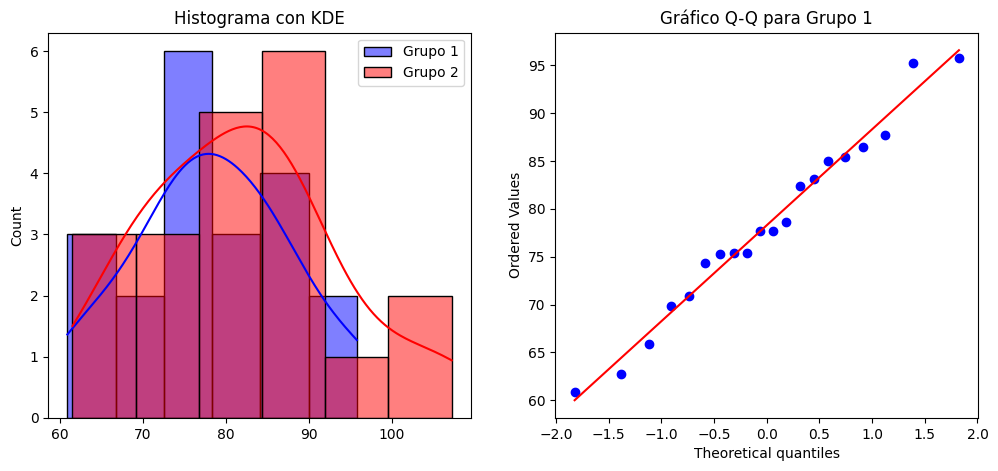

Shapiro-Wilk para Grupo 1: p-valor = 0.8479
Shapiro-Wilk para Grupo 2: p-valor = 0.7676
t-Student: p-valor = 0.3026
Chi-cuadrado: p-valor = 0.0848


In [ ]:
# 📌 Simulamos dos grupos de datos (Ejemplo: calificaciones con y sin música)
np.random.seed(42)
grupo_1 = np.random.normal(loc=80, scale=10, size=20)  # Distribución normal
grupo_2 = np.random.normal(loc=85, scale=12, size=20)  # Distribución normal pero con media distinta

# 📊 1. Verificación gráfica de normalidad
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(grupo_1, kde=True, color="blue", label="Grupo 1")
sns.histplot(grupo_2, kde=True, color="red", label="Grupo 2")
plt.legend()
plt.title("Histograma con KDE")

plt.subplot(1, 2, 2)
stats.probplot(grupo_1, dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Grupo 1")

plt.show()

# 📊 2. Prueba de normalidad con Shapiro-Wilk
stat1, p_value1  = stats.shapiro(grupo_1)
stat2, p_value2  = stats.shapiro(grupo_2)

print(f"Shapiro-Wilk para Grupo 1: p-valor = {p_value1:.4f}")
print(f"Shapiro-Wilk para Grupo 2: p-valor = {p_value2:.4f}")

# Hipótesis:
# H₀: Los datos siguen una distribución normal.
# H₁: Los datos no siguen una distribución normal.

# 📊 3. Selección del test según la normalidad
if p_value1 > 0.05 and p_value2 > 0.05:
    # Si ambos son normales, usamos t-Student
    t_stat, p_value = stats.ttest_ind(grupo_1, grupo_2)
    print(f"t-Student: p-valor = {p_value:.4f}")
else:
    # Si alguno no es normal, usamos Mann-Whitney
    mw_stat, p_value = stats.mannwhitneyu(grupo_1, grupo_2)
    print(f"Mann-Whitney U: p-valor = {p_value:.4f}")

# 📊 4. Ejemplo de Chi-cuadrado
# Simulamos una tabla de frecuencia para la dieta vs hipertensión
tabla = np.array([[30, 20], [25, 35]])  # Frecuencias observadas
chi2, p, dof, expected = stats.chi2_contingency(tabla)

print(f"Chi-cuadrado: p-valor = {p:.4f}")
